1)

$$(\frac{\dot{a}}{a})^2 = \frac{8\pi G}{3c^2}\epsilon-kc^2/a^2 ----- (1)$$

$$\dot\epsilon +3 (\frac{\dot{a}}a)(\epsilon+P)=0  ------ (2)$$

We can take the time derivative of (1) after rearranging and divide by $$2a\dot{a}$$ and we get that

$$ 
\frac{\ddot{a}}a = \frac{4\pi G}{3c^2}(\epsilon\frac{a}{\dot{a}}+2\epsilon)$$

Then, using equation (2) we can solve for $$ \frac{a}{\dot{a}}=-\frac{3(\epsilon+P)}{\dot{\epsilon}} $$

Combining the two together gives:


$$ \frac{\ddot{a}}a = \frac{4\pi G}{3c^2}(-3(\epsilon+P)+2\epsilon)$$

$$ \frac{\ddot{a}}a = \frac{4\pi G}{3c^2}(\epsilon+3P)$$

which is the independent third equation.

2a) omega_m = 0.3, omega_r = 0, omega_lambda = 0.7, omega_0 = 1

Comoving distance from z=0 to z=10 is  9446784.98 Mpc for a flat universe with the given parameters.


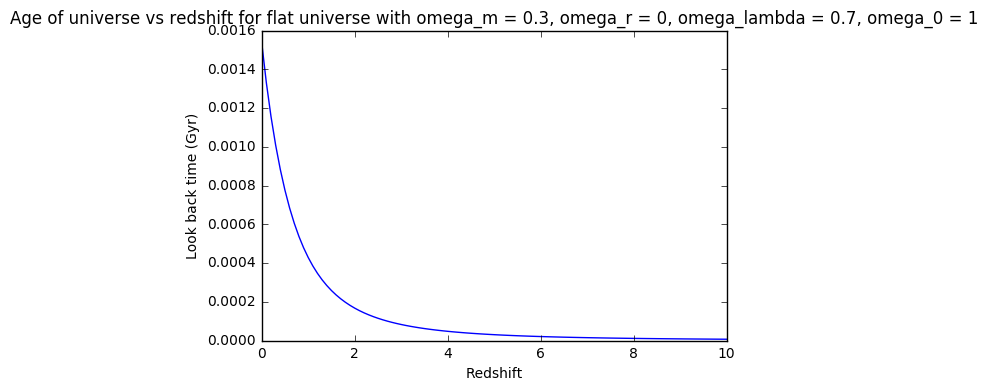

The total age of the universe is  0.01484  ±  1.64703234039e-16 5 Gigayears.

2b)  omega_m = 10, omega_r = 0, omega_lambda = 0, omega_0 = 10

Comoving distance from z=0 to z=10 is  10276694.03 Mpc for a closed universe with given parameters.


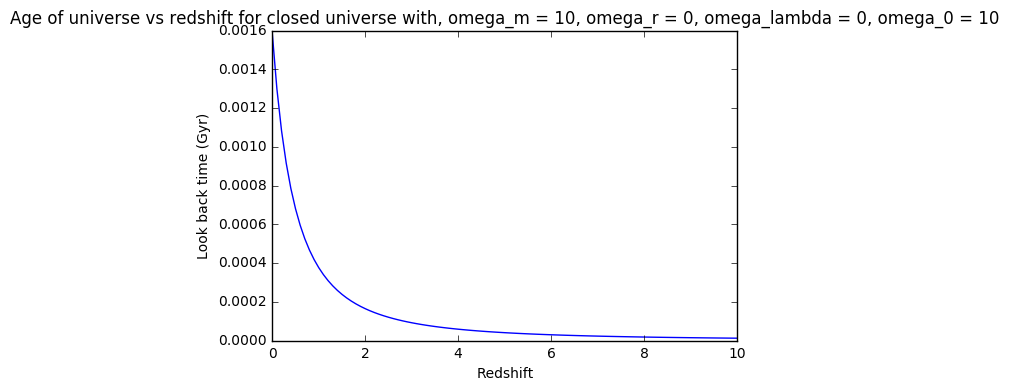

1.61807396085e-16
The total age of the universe is  0.01457  ±  1.61807396085e-16 Gigayears.



In [17]:
import numpy as np
import scipy.integrate as spint
import matplotlib.pyplot as plt
import math as math


#limits 0<=z<=10
a=0
b=10
N=100     #Number of steps
h=(b-a)/N #stepSize
#Array to hold values
z = np.arange(a,b+h,h)
flatT = np.zeros((N+1,))


#2a omega_m = 0.3, omega_r = 0, omega_lambda = 0.7, omega_0 = 1
print("2a) omega_m = 0.3, omega_r = 0, omega_lambda = 0.7, omega_0 = 1")
print("")

#a)Measuring the comoving distance
flatComovingIntegrand = lambda z: 3*10**8/(70*math.sqrt(0.3*(1+z)**3+0.7))
flatComovingDistance, errorFlatComoving = spint.quad(flatComovingIntegrand, 0, 10)
print("Comoving distance from z=0 to z=10 is ", round(flatComovingDistance,2), "Mpc for a flat universe with the given parameters.")

#--------------------------------------------------------

#b)Age of the universe at a given redshift from z=0 to z=10

#Integrate for (a) 
#We know dt = dz/((1+z)H(z))
#integrating over age gives look back time
flatIntegrand = lambda z: 1/(1+z)*1/(70*math.sqrt(0.3*(1+z)**3+0.7))
i=0
errorFlat = np.zeros((N+1,))
for i in range(0,N+1):
    flatInt, errorFlatInt = spint.quad(flatIntegrand,a+h*(i-1),a+(h*i))
    flatT[i] = flatInt
    errorFlat[i] = errorFlatInt

plt.figure(1)
plt.plot(z,flatT)
plt.title("Age of universe vs redshift for flat universe with omega_m = 0.3, "
          "omega_r = 0, omega_lambda = 0.7, omega_0 = 1")
plt.xlabel("Redshift")
plt.ylabel("Look back time (Gyr)")
plt.show()

ageOfFlatUniverse = sum(flatT)
errorAgeOfFlat = sum(errorFlat)
print("The total age of the universe is ", round(ageOfFlatUniverse,5), " ± ", errorAgeOfFlat,5,"Gigayears.")
print("")

#--------------------------------------------------------------------------
#--------------------------------------------------------------------------
#--------------------------------------------------------------------------

#2b  omega_m = 10, omega_r = 0, omega_lambda = 0, omega_0 = 10

print("2b)  omega_m = 10, omega_r = 0, omega_lambda = 0, omega_0 = 10")
print("")

#a)Measuring the comoving distance
flatComovingIntegrand = lambda z: 3*10**8/(70*math.sqrt(10*(1+z)**2+(-9)*(1+z)**2))
flatComovingDistance, errorFlatComoving = spint.quad(flatComovingIntegrand, 0, 10)
print("Comoving distance from z=0 to z=10 is ", round(flatComovingDistance,2), "Mpc for a closed universe with given parameters.")

#--------------------------------------------------------------------------

#b)Age of the universe at a given redshift from z=0 to z=10

#Array to hold values
closedT = np.zeros((N+1,))

#Integrate for (b) omega_m = 10, omega_r = 0, omega_lambda = 0, omega_0 = omega_m+omega_r+omega_lambda = 10
closedIntegrand = lambda z: 1/(1+z)*1/(70*math.sqrt(10*(1+z)**2+(-9)*(1+z)**2))
i=0
errorClosed = np.zeros((N+1,))
for i in range(0,N+1):
    closedInt, errorClosedInt = spint.quad(closedIntegrand,a+h*(i-1),a+(h*i))
    closedT[i] = closedInt
    errorClosed[i] = errorClosedInt

plt.figure(2)
plt.plot(z,closedT)
plt.title("Age of universe vs redshift for closed universe with, "
          "omega_m = 10, omega_r = 0, omega_lambda = 0, omega_0 = 10")
plt.xlabel("Redshift")
plt.ylabel("Look back time (Gyr)")
plt.show()

ageOfClosedUniverse = sum(closedT)
errorAgeOfClosed = sum(errorClosed)
print("The total age of the universe is ", round(ageOfClosedUniverse,5), " ± ", errorAgeOfClosed,"Gigayears.")
print("")

In [292]:
import numpy as np
import scipy.integrate as spint
import matplotlib.pyplot as plt
import math as math
import random as rand

#limits 0<=z<=10
a=0
b=10
N=100     #Number of steps
h=(b-a)/N #stepSize
#Array to hold values
z = np.arange(a,b+h,h)
flatT = np.zeros((N+1,))


#3 omega_m = 0, omega_r = unknown, omega_lambda = 0, omega_0 = omega_r
print("3) omega_m = 0, omega_r = unknown, omega_lambda = 0, omega_0 = omega_r")
print("")


# Age of the universe at a given redshift from z=0 to z=10

x= -0.0035
print("For omega_r = ",x," in an open universe with no cosmological constant,")
flatIntegrand = lambda z: 1/(1+z)*1/(70*math.sqrt(x*(1+z)**4+(1-x)*(1+z)**2))
i=0
for i in range(0,N+1):
    flatInt, errorFlatInt = spint.quad(flatIntegrand,a+h*(i-1),a+(h*i))
    flatT[i] = flatInt

ageOfFlatUniverse = sum(flatT)
print("The total age of the universe is ", round(ageOfFlatUniverse,5), "Gigayears, which is the estimate",
      "for the benchmark flat universe")
print("However, a negative omega_r means that the energy density for relativistic matter is negative,")
print("which doesn't make sense")


3) omega_m = 0, omega_r = unknown, omega_lambda = 0, omega_0 = omega_r

For omega_r =  -0.0035  in an open universe with no cosmological constant,
The total age of the universe is  0.01484 Gigayears, which is the estimate for the benchmark flat universe
However, a negative omega_r means that the energy density for relativistic matter is negative,
which doesn't make sense
